In [1]:
import sys
print (sys.version)

3.7.2 (v3.7.2:9a3ffc0492, Dec 24 2018, 02:44:43) 
[Clang 6.0 (clang-600.0.57)]


In [2]:
#https://stackoverflow.com/questions/47944782/r-data-scraping-crawling-with-dynamic-multiple-urls
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import random

In [3]:
string = "this is zürcher obwaldene Bern uriniert banana apples"
cantons =['bern','luzern','uri','schwyz','obwalden','nidwalden','zürich','berne','lucerne']

print([s for s in cantons if string in s])
#if any(x in string for x in cantons):
        #print([x in string for x in cantons])
fruit_list = ['bern','luzern','uri','schwyz','obwalden','nidwalden','zürich','berne','lucerne']
fruit = re.compile(r'\b(?:%s)\b' % '|'.join(fruit_list), re.IGNORECASE)
print(fruit)
fruit.search(string).group()

[]
re.compile('\\b(?:bern|luzern|uri|schwyz|obwalden|nidwalden|zürich|berne|lucerne)\\b', re.IGNORECASE)


'Bern'

In [3]:
#from nltk.corpus import stopwords
#import nltk
#nltk.download('stopwords')

In [4]:
import locale, datetime #for stringparsing in german
locale.setlocale(locale.LC_ALL, "de_de")
#locale.setlocale(locale.LC_ALL, "fr_FR")

'de_de'

**Extracting the index leading to mandate**

In [5]:
#highlight_docid=atf%3A%2F%2F95-IV-162
queryKeyword = "mord"
queryRank = "1"
#bgerQuery2 = "https://www.bger.ch/ext/eurospider/live/de/php/clir/http/index.php?lang=de&type=highlight_simple_query&page=1&from_date=&to_date=&from_year=1954&to_year=2019&sort=relevance&insertion_date=&from_date_push=&top_subcollection_clir=bge&query_words="+ queryKeyword + "&part=all&de_fr=&de_it=&fr_de=&fr_it=&it_de=&it_fr=&orig=&translation=&rank="+queryRank+"&highlight_docid=atf%3A%2F%2F95-IV-162%3Ade&number_of_ranks=945&azaclir=clir"

In [6]:
#bgerQuery2 = 'https://www.bger.ch/ext/eurospider/live/de/php/clir/http/index.php?lang=de&type=simple_query&query_words='+ queryKeyword +'&lang=de&top_subcollection_clir=bge&from_year=1954&to_year=2019'

In [6]:
from_year = "2017"
to_year = "2019"

bgerQuery2 = 'https://www.bger.ch/ext/eurospider/live/de/php/clir/http/index.php?lang=de&type=simple_query&query_words='+ queryKeyword +'&lang=de&top_subcollection_clir=bge&from_year='+ from_year + '&to_year=' + to_year

In [7]:
bgerQuery2

'https://www.bger.ch/ext/eurospider/live/de/php/clir/http/index.php?lang=de&type=simple_query&query_words=mord&lang=de&top_subcollection_clir=bge&from_year=2017&to_year=2019'

In [8]:
#check if content was loaded properly
bgerQuery2 = requests.get(bgerQuery2)
bgerQuery2

<Response [200]>

In [10]:
#bgerQuery2.content

In [11]:
#soup = BeautifulSoup(page.content, 'html.parser')

In [9]:
bgerSoup = BeautifulSoup(bgerQuery2.content, 'html.parser')

In [10]:
#bgerSoup

In [11]:
links = bgerSoup.find_all(class_='rank_title')
linksList = []
for a in links:
    linksList.append(a.find('a')['href'])
    #print(a)
print(linksList[0])

https://www.bger.ch/ext/eurospider/live/de/php/clir/http/index.php?lang=de&type=highlight_simple_query&page=1&from_date=&to_date=&from_year=2017&to_year=2019&sort=relevance&insertion_date=&from_date_push=&top_subcollection_clir=bge&query_words=mord&part=all&de_fr=&de_it=&fr_de=&fr_it=&it_de=&it_fr=&orig=&translation=&rank=1&highlight_docid=atf%3A%2F%2F144-IV-285%3Ade&number_of_ranks=10&azaclir=clir


**Make a new query with Linkslist (only based on first entry)**

In [12]:
mBger = requests.get(linksList[0])

In [16]:
#mBger.content

In [13]:
mBger = BeautifulSoup(mBger.content, 'html.parser')

In [14]:
#mBger

**display children / find correct html elements**

In [15]:
len(list(mBger.children))
#find body
body = list(mBger.children)[12]
len(list(body.children))
#body

33

**get all required variables from verdict**

**dateparser for string dates**

In [16]:
text2 = "41. Urteil des Kassationshofes vom 5. octobre 1969 i.S. Staatsanwaltschaft des Kantons Aargau gegen Brunner."

def parseDate(text):
    pattern = re.compile(r"""
        \d\d?   # one or two digits
        \.?
        \s?      # \s for space - one space after
        [a-z,ä,ö,ü,é,û]+  # at least one+ ascii letters (ignore case is use)set of characters that you wish to match / since + means ‘one or more repetitions’
        \s?      # one space after
        \d{4}   # four decimal digits = \d (year)
    """,re.IGNORECASE|re.VERBOSE)
    #print(pattern.search(text))
    if (pattern.search(text)!= None):
        #print("pattern detected")
        #print(pattern.search(text).group(), type(pattern.search(text).group()))
        dateStr = pattern.search(text).group()
        dateStr = dateStr.replace(".", "")
        #print(dateStr)
        #dateStr = dateStr.format('DD MMMM YYYY', locale='de')
        dateStr = detectLanguage(dateStr)
        #print(dateStr)
        #dateStr = dateStr.strftime('%m/%d/%Y')
        return dateStr
    else:
        return 0 #make 0 if date can't be found ig not existent or different language

In [17]:
import arrow

In [18]:
def detectLanguage(string):
    months_de = ["januar", "februar", "märz", "april", "mai","juni","juli", "august", "september", "oktober", "november", "dezember"]
    months_fr = ["janvier", "février", "mars", "avril", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre"]
    months_it = ["gennaio", "febbraio", "marzo", "aprile", "maggio", "giugno", "luglio", "agosto", "settembre", "ottobre", "novembre"," dicembre"]
    string2 = string.lower().split()
    if any(x in string2 for x in months_de):
        print("deutsch",string)
        string = arrow.get(string, 'D MMMM YYYY', locale='de')
        #string.format('YYYY-MMMM-DD')
        string = string.strftime('%Y-%m-%d')
        return string
    elif any(x in string2 for x in months_fr):
        string = arrow.get(string, 'D MMMM YYYY', locale='fr')
        string = string.strftime('%Y-%m-%d')
        #string.format('YYYY-MMMM-DD')
        print("french",string)
        return string
    elif any(x in string2 for x in months_it):
        print("italian",string)
        string = arrow.get(string, 'D MMMM YYYY', locale='it')
        string = string.strftime('%Y-%m-%d')
        return string
    else:
        string = 0
        print("string not detected")
        return string

In [19]:
print(parseDate('14 aprile 2005'))

italian 14 aprile 2005
2005-04-14


**genderparser**

In [21]:
male= ["er", "sein", "seine", "ihm", "ihn", "il", "lui"]
female = ["sie", "ihr", "ihre", "ihren", "elle","lei"]

#for item in text:
    
    

**Get NAME, DATE, SUBLINKS of MAIN MANDATE**

In [22]:
def cleanString(string):
    if string[len(string)-1] == 'S':
        string = string[:-1]
    string = string.rstrip()
    string = string[4:]
    return string

In [23]:
def extractLinks(htmlElements):
    array = []
    for a in htmlElements:
        #print(a)
        if a['href'] not in array: #make sure to not add duplicate mandates
            array.append(a['href'])
    return array

In [24]:
def listing(elementlist):
    ar = []
    for item in elementlist:
        if item.get_text() not in ar:
            #print(item.get_text())
            ar.append(item.get_text())
    #print(ar)
    return ar

In [25]:
def getEdges(linkNames, ID):
    edgeList = []
    if linkNames: #list has items
        #print("links list is not empty", linkNames)
        for i, val in enumerate(linkNames):
            #print(i)
            val = cleanString(val)
            oj = {"source": ID, "target": val}
            if oj not in edgeList:
                #print(type(oj), "is in list")
                edgeList.append(oj)
    return edgeList
#links_main

In [26]:
def getDateName(link):
    #nodes = []
    r = requests.get(link)
    linkSoup = BeautifulSoup(r.content, 'html.parser')
    body = list(linkSoup.children)[12]
    #ID of mandate
    mID = cleanString(body.find_all('div', class_="center pagebreak")[0].get_text()[:14])
    #print(mID)
    mDate = body.find_all(class_="paraatf")[1].get_text()
    test = body.find_all(class_="paraatf")
    #quickfix, skip all dates that can't be parsed
    mDateParsed = parseDate(mDate)
    mRefs = body.find_all(class_="bgeref_id")
    mRefsLinks = extractLinks(mRefs)
    regeste = body.find("div", {"id" : "regeste"}).get_text()
    mRefsNames = listing(mRefs) #LIST with all str names
    subEdges = getEdges(mRefsNames, mID) #LIST with dicts for each connection
    #print(mRefsLinks)
    return mID, mDateParsed, mRefsLinks, subEdges, mRefsNames, regeste, test

In [27]:
mandate1 = getDateName(linksList[0])
mandate2 = getDateName(linksList[1])
mandate3 = getDateName(linksList[2])


deutsch 15 August 2018
deutsch 23 Mai 2018
deutsch 25 Oktober 2017


In [34]:
mandate1[6]

[<div class="paraatf">34. Auszug aus dem Urteil der Strafrechtlichen Abteilung i.S. Oberstaatsanwaltschaft des Kantons Zürich gegen X. (Beschwerde in Strafsachen)</div>,
 <div class="paraatf">6B_1091/2017 vom 15. August 2018</div>,
 <div class="paraatf"><span class="artref">Art. 70 Abs. 1 StGB</span>, <span class="artref">Art. 540 Abs. 1 Ziff. 1 ZGB</span>; mehrfacher <span class="exact_match" id="highlight_match_677">Mord</span>; Erbunwürdigkeit; Gültigkeit von Zuwendungen der Erben an die erbunwürdige Person; Voraussetzungen für die Vermögenseinziehung.  <div class="paratf">Inhalt und Rechtsnatur der Bestimmung über die Erbunwürdigkeit von <span class="artref">Art. 540 Abs. 1 Ziff. 1 ZGB</span>. Nicht nach <span class="artref">Art. 70 Abs. 1 StGB</span> einziehbar sind Vermögenswerte, die aus einem objektiv legalen Rechtsgeschäft stammen (Bestätigung der Rechtsprechung). Die beurteilte Vereinbarung, wonach der Täter auf eine Erbenstellung verzichtet und im Gegenzug dazu von den Erben

In [127]:
p = mandate3[6]
par = ''
for x in p:
    #print(x.text)
    par += str(x.text)

In [128]:
par

'50. Auszug aus dem Urteil der Strafrechtlichen Abteilung i.S. X. gegen Staatsanwaltschaft des Kantons Basel-Stadt (Beschwerde in Strafsachen)6B_800/2016 vom 25. Oktober 2017Art. 147 Abs. 1 StPO; Verzicht auf das Teilnahmerecht.  Der Verzicht des Beschuldigten auf sein Teilnahmerecht bei Beweiserhebungen durch die Staatsanwaltschaft kann auch vom Verteidiger erklärt werden. Soweit der bei Einvernahmen anwesende Verteidiger gegen die Abwesenheit des Beschuldigten nicht opponiert und keinen Antrag auf dessen Teilnahme stellt, darf angenommen werden, dieser habe auf sein Teilnahmerecht verzichtet. Soweit ein gültiger Verzicht vorliegt, verletzt die im Berufungsverfahren erhobene Rüge der Verletzung des Teilnahmerechts den Grundsatz von Treu und Glauben (E. 3.4). \nArt. 6 Ziff. 3 lit. d EMRK, Art. 152 Abs. 3 i.V.m. Art. 149 Abs. 2 lit. b StPO; indirekte Konfrontation.  Bei der Wahrung des Konfrontationsrechts sind die Interessen der Verteidigung gegen diejenigen des Opfers abzuwägen. Sowei

In [129]:
p1 = mandate1[6]
par1 = ''
for x in p1:
    par1 += str(x.text)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib
%matplotlib inline

In [25]:
germanStopwords = []
with open('german.txt', 'r') as f:
    for line in f:
        #print(line)
        germanStopwords.append(line.strip())
         #do_somthing_with(line.strip())

In [105]:
#germanStopwords

In [130]:
vectorizer = TfidfVectorizer(stop_words = germanStopwords)
response = vectorizer.fit_transform([par, par1])
response = response.todense().tolist()
df = pd.DataFrame(response, columns=vectorizer.get_feature_names())

In [133]:
text1 = df.loc[0].sort_values()
text1 = text1[text1 > 0.07]
text2 = df.loc[1].sort_values()
text2 = text2[text2 > 0.07]

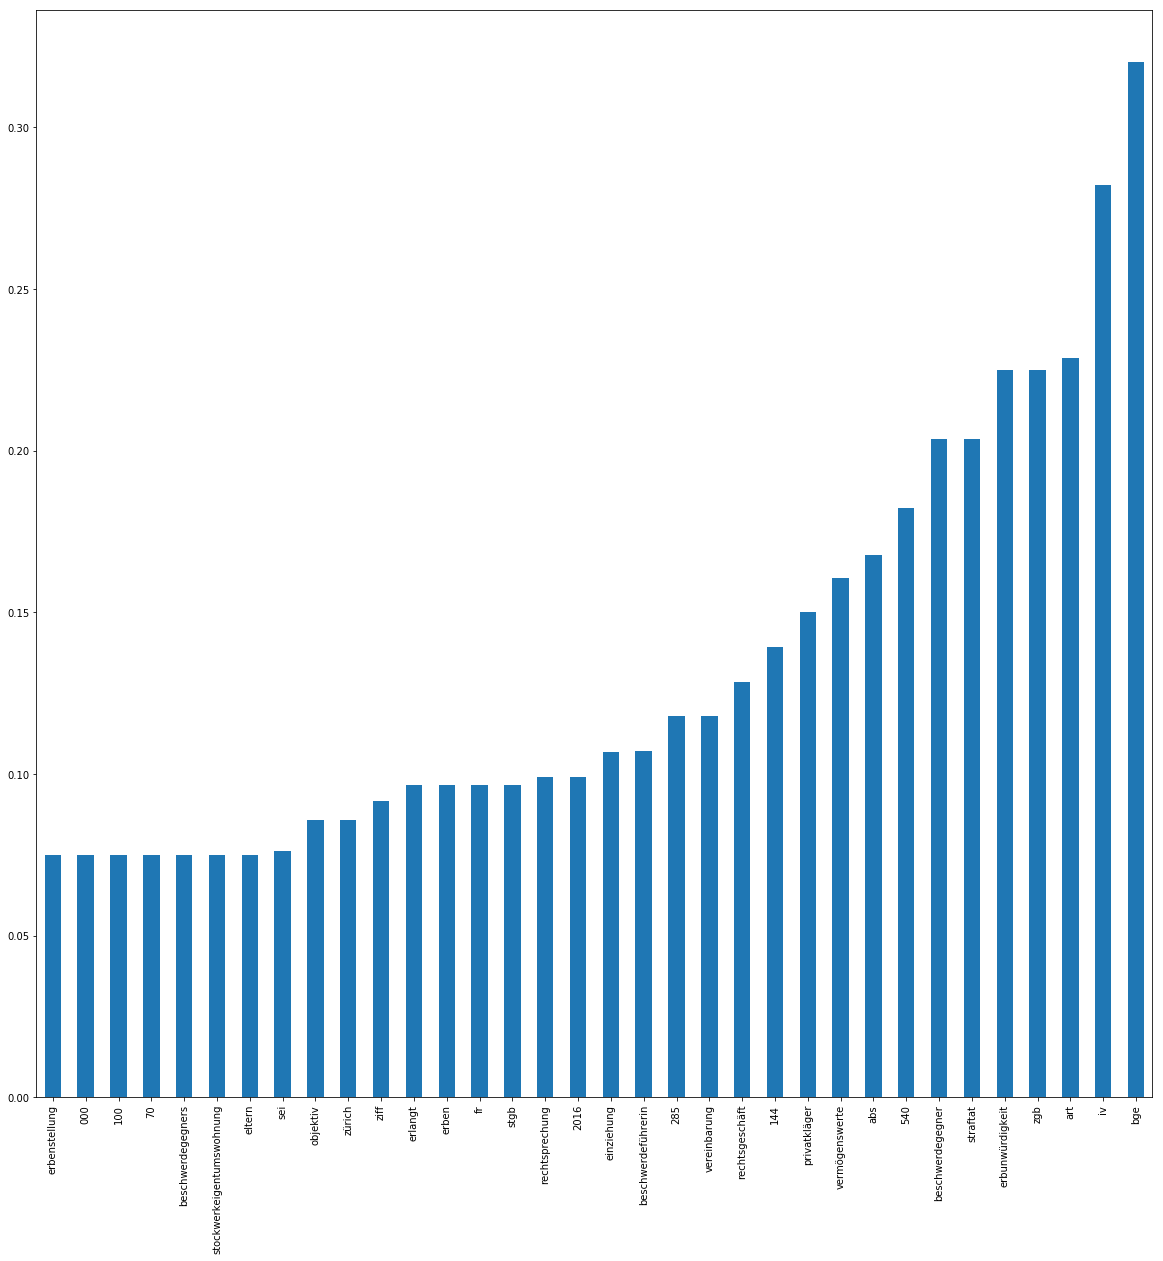

In [135]:
text2.plot(kind="bar", figsize=(20,20), sort_columns=True)

In [68]:
print(len(vectorizer.get_feature_names()),vectorizer.get_feature_names())

113 ['10', '32', '540', '70', 'abs', 'an', 'anwendung', 'art', 'auf', 'aus', 'begründen', 'bestimmung', 'bestätigung', 'beurteilte', 'beweismittel', 'beweiswürdigung', 'bv', 'das', 'dazu', 'dem', 'den', 'der', 'des', 'die', 'diesem', 'dieser', 'dubio', 'eine', 'einem', 'einen', 'einziehbar', 'einziehung', 'eltern', 'emrk', 'erben', 'erbenstellung', 'erbunwürdige', 'erbunwürdigkeit', 'erheblicher', 'erhält', 'erst', 'freien', 'für', 'gegenzug', 'geldbetrag', 'getöteten', 'grundsatz', 'grundsatzes', 'grundsätze', 'gültig', 'gültigkeit', 'im', 'immobilie', 'in', 'inhalt', 'ist', 'kann', 'keinen', 'kommt', 'legalen', 'lässt', 'mehrfacher', 'mord', 'mordes', 'nach', 'nachlass', 'nicht', 'nur', 'objektiv', 'offensichtlich', 'person', 'pro', 'raum', 'rechtsgeschäft', 'rechtsnatur', 'rechtsprechung', 'regel', 'regeste', 'reo', 'sammlung', 'seiner', 'sichtung', 'sind', 'sowie', 'späteren', 'stadium', 'stammen', 'stgb', 'stpo', 'tatbestandselemente', 'tragen', 'täter', 'und', 'unschuldsvermutung

In [88]:
nodes = []
nodes.append({"id": mandate1[0],"date":mandate1[1],"relevancy":10, "level": 1, "outDegree": len(mandate1[4])})

In [33]:
nodes

[{'id': '144 IV 285',
  'date': '2018-08-15',
  'relevancy': 10,
  'level': 1,
  'outDegree': 18}]

**Get NAMES, DATE and SUBLINKS of each LINKED MANDATES in list (PROBLEM: many are in french & dateparser return 0)**

In [34]:
#mandate1[4]

these are the main lists we will append everything to: "nodes" and "edges"

In [35]:
#edges = getEdges(mRefs,mandate1[0])

In [36]:
#len(edges)

In [37]:
#edges

In [38]:
linksLevel2 = mandate1[2]

informationen zu jeder ID level2 <br>
wenn Jahr von ID level 2 existiert, dann source: ID level1, target: ID level2

In [90]:
linksLevel3= []
edges2 = []
counter = 0
for url in linksLevel2: #level 2
    #print(i,val)
    mandate2 = getDateName(url)
    #check if mandate already exists at date isn't 0 not sure if working. will edge connections be skipped? 
    if mandate2[1] == 0:
        print("here date was 0", mandate2[0])
        
    #problem: in edges, all ids are appended, in nodes only the ones with dates. 
    if (mandate2[1] != 0 and mandate2[0] not in nodes):
        #print("jump to next level", mandate2[1])
        #print("next edgelist", mandate2[3], mandate2[1],mandate2[0])
        oj = {"id": mandate2[0],"date":mandate2[1],"relevancy":random.randint(1,9), "level": 2, "outDegree":len(mandate2[4])}
        nodes.append(oj)
        linksLevel3.append([mandate2[0], mandate2[2]])
        #print("mandates linked",len(mandate2[4]),"list",mandate2[4], "mandate", mandate2[0])
        #edges + mandate2[3]
        edges2.append({"source": mandate1[0], "target": mandate2[0]})
        #edges.extend(mandate2[3])

here date was 0 125 IV 4
here date was 0 120 IV 365


In [40]:
#nodes

In [91]:
#linksLevel3= sum(linksLevel3,[])
for nestedItem in linksLevel3: #iterate through nested item in list. each item contains all sublinks and the source ID
    print("NEW ITEM", nestedItem[0])
    for url in nestedItem[1]: #for each source iterate through all links
        #print("NEW SUBITEM", url)
        mandate3 = getDateName(url)
        if (mandate3[1] != 0 and mandate3[0] not in nodes):
            #print(mandate3[1] != 0)
            oj = {"id": mandate3[0],"date":mandate3[1],"relevancy":random.randint(1,6), "level": 3, "outDegree":len(mandate3[4])}
            #print(oj)
            nodes.append(oj)
            edges2.append({"source": nestedItem[0], "target": mandate3[0]})

NEW ITEM 144 IV 1
NEW ITEM 141 IV 155
NEW ITEM 140 IV 57
NEW ITEM 129 IV 305
NEW ITEM 138 IV 1
NEW ITEM 136 IV 4
NEW ITEM 129 II 453
NEW ITEM 137 IV 79
NEW ITEM 137 IV 305
NEW ITEM 132 III 31
NEW ITEM 132 III 30
NEW ITEM 139 IV 209
NEW ITEM 143 II 661
NEW ITEM 143 III 24
NEW ITEM 142 IV 237
NEW ITEM 142 IV 383


In [194]:
nodes

[{'id': '144 IV 285',
  'date': '2018-08-15',
  'relevancy': 10,
  'level': 1,
  'outDegree': 18,
  'inDegree': 16},
 {'id': '144 IV 1',
  'date': '2017-10-24',
  'relevancy': 5,
  'level': 2,
  'outDegree': 17,
  'inDegree': 0},
 {'id': '141 IV 155',
  'date': '2015-02-25',
  'relevancy': 2,
  'level': 2,
  'outDegree': 13,
  'inDegree': 7},
 {'id': '140 IV 57',
  'date': '2014-03-06',
  'relevancy': 6,
  'level': 2,
  'outDegree': 24,
  'inDegree': 0},
 {'id': '129 IV 305',
  'date': '2003-09-16',
  'relevancy': 2,
  'level': 2,
  'outDegree': 14,
  'inDegree': 2},
 {'id': '138 IV 1',
  'date': '2011-12-08',
  'relevancy': 6,
  'level': 2,
  'outDegree': 5,
  'inDegree': 0},
 {'id': '136 IV 4',
  'date': '2010-01-12',
  'relevancy': 2,
  'level': 2,
  'outDegree': 19,
  'inDegree': 5},
 {'id': '129 II 453',
  'date': '2003-10-27',
  'relevancy': 8,
  'level': 2,
  'outDegree': 12,
  'inDegree': 0},
 {'id': '137 IV 79',
  'date': '2011-01-25',
  'relevancy': 9,
  'level': 2,
  'outDeg

In [203]:
nodes2 = nodes

**Count In degree connections**

In [191]:
nodes4 = [{'id': '144 IV 285',
  'date': '2018-08-15',
  'relevancy': 10,
  'level': 1,
  'outDegree': 18},
 {'id': '144 IV 1',
  'date': '2017-10-24',
  'relevancy': 5,
  'level': 2,
  'outDegree': 17},
 {'id': '141 IV 155',
  'date': '2015-02-25',
  'relevancy': 2,
  'level': 2,
  'outDegree': 13},
 {'id': '140 IV 57',
  'date': '2014-03-06',
  'relevancy': 6,
  'level': 2,
  'outDegree': 24},
 {'id': '129 IV 305',
  'date': '2003-09-16',
  'relevancy': 2,
  'level': 2,
  'outDegree': 14},
    {'id': '100 IV 340',
  'date': '2002-09-16',
  'relevancy': 2,
  'level': 2,
  'outDegree': 4},
    {'id': '101 IV 340',
  'date': '2002-09-16',
  'relevancy': 11,
  'level': 0,
  'outDegree': 2}]

In [43]:
from collections import Counter

In [199]:
sources = [x['target'] for x in edges2]
sources = Counter(sources)
sources = list(sources.items())

In [200]:
sources

[('144 IV 1', 1),
 ('141 IV 155', 2),
 ('140 IV 57', 2),
 ('129 IV 305', 3),
 ('138 IV 1', 2),
 ('136 IV 4', 1),
 ('129 II 453', 2),
 ('137 IV 79', 4),
 ('137 IV 305', 3),
 ('132 III 31', 1),
 ('132 III 30', 2),
 ('139 IV 209', 3),
 ('143 II 661', 1),
 ('143 III 24', 1),
 ('142 IV 237', 1),
 ('142 IV 383', 2),
 ('138 I 97', 1),
 ('141 IV 305', 1),
 ('130 III 24', 1),
 ('138 III 49', 1),
 ('141 IV 317', 1),
 ('129 IV 107', 3),
 ('134 IV 185', 1),
 ('128 IV 145', 1),
 ('137 II 431', 1),
 ('139 III 13', 1),
 ('138 I 435', 1),
 ('137 IV 122', 1),
 ('128 II 259', 1),
 ('138 IV 186', 1),
 ('137 IV 340', 1),
 ('129 I 103', 1),
 ('128 I 129', 1),
 ('131 I 333', 1),
 ('131 I 425', 1),
 ('137 III 52', 1),
 ('136 IV 92', 1),
 ('137 IV 246', 1),
 ('139 IV 250', 1),
 ('137 IV 145', 1),
 ('133 IV 215', 1),
 ('129 IV 49', 1),
 ('128 IV 81', 1),
 ('129 IV 238', 2),
 ('133 IV 76', 1),
 ('130 II 217', 1),
 ('132 II 218', 1),
 ('129 II 56', 1),
 ('131 II 169', 1),
 ('129 I 173', 1),
 ('129 II 225', 1),
 

In [204]:
for item2 in nodes2:
    sources = list(zip(*sources))
    #print(sources[1][0])
    if item2["id"] in sources[0]:
        print(sources[1][sources[0].index(item2["id"])], "id",item2["id"])
        item2.update({"inDegree": sources[1][sources[0].index(item2["id"])]})
    else:
        item2.update({"inDegree": 0})

1 id 144 IV 1
2 id 140 IV 57
2 id 138 IV 1
2 id 129 II 453
3 id 137 IV 305
2 id 132 III 30
1 id 143 II 661
1 id 142 IV 237
1 id 138 I 97
2 id 141 IV 155
3 id 139 IV 209
1 id 141 IV 305
1 id 130 III 24
1 id 141 IV 317
3 id 129 IV 107
4 id 137 IV 79
1 id 128 IV 145
1 id 139 III 13
1 id 137 IV 122
1 id 138 IV 186
1 id 129 I 103
1 id 131 I 333
1 id 137 III 52
1 id 137 IV 246
1 id 137 IV 145
2 id 129 II 453
1 id 133 IV 215
1 id 128 IV 81
4 id 137 IV 79
1 id 130 II 217
1 id 129 II 56
1 id 129 I 173
2 id 129 IV 238
3 id 129 IV 107
2 id 132 III 30
3 id 129 IV 305
2 id 133 III 46
1 id 128 III 18
2 id 142 III 43
3 id 139 V 176
1 id 139 II 404
3 id 130 III 18
1 id 133 II 153
1 id 134 III 24
2 id 142 III 43
1 id 134 III 37
1 id 132 III 35
1 id 139 IV 206
2 id 129 V 177


In [205]:
nodes2

[{'id': '144 IV 285',
  'date': '2018-08-15',
  'relevancy': 10,
  'level': 1,
  'outDegree': 18,
  'inDegree': 0},
 {'id': '144 IV 1',
  'date': '2017-10-24',
  'relevancy': 5,
  'level': 2,
  'outDegree': 17,
  'inDegree': 1},
 {'id': '141 IV 155',
  'date': '2015-02-25',
  'relevancy': 2,
  'level': 2,
  'outDegree': 13,
  'inDegree': 0},
 {'id': '140 IV 57',
  'date': '2014-03-06',
  'relevancy': 6,
  'level': 2,
  'outDegree': 24,
  'inDegree': 2},
 {'id': '129 IV 305',
  'date': '2003-09-16',
  'relevancy': 2,
  'level': 2,
  'outDegree': 14,
  'inDegree': 0},
 {'id': '138 IV 1',
  'date': '2011-12-08',
  'relevancy': 6,
  'level': 2,
  'outDegree': 5,
  'inDegree': 2},
 {'id': '136 IV 4',
  'date': '2010-01-12',
  'relevancy': 2,
  'level': 2,
  'outDegree': 19,
  'inDegree': 0},
 {'id': '129 II 453',
  'date': '2003-10-27',
  'relevancy': 8,
  'level': 2,
  'outDegree': 12,
  'inDegree': 2},
 {'id': '137 IV 79',
  'date': '2011-01-25',
  'relevancy': 9,
  'level': 2,
  'outDegr

In [172]:
test = [d for i,d in enumerate(nodes4) if 'inDegree' not in d]
print(test)
#test.update({'inDegree':0})

[{'id': '100 IV 340', 'date': '2002-09-16', 'relevancy': 2, 'level': 2, 'outDegree': 4}, {'id': '101 IV 340', 'date': '2002-09-16', 'relevancy': 11, 'level': 0, 'outDegree': 2}]


In [48]:
len(nodes)

99

In [49]:
len(nodes)

99

In [50]:
len(nodes)

99

In [ ]:
edges2

In [210]:
data = {"nodes": nodes2,
       "links": edges2
       }

In [223]:
# as requested in comment
exDict = {'nodes': nodes2}

with open('nodes.txt', 'w') as file:
     file.write(json.dumps(nodes2)) # use `json.loads` to do the reverse

In [229]:
number = 2
for i in range(1):
    print(i)

0


In [230]:
wordlist = ["mord", "diebstahl"]
for i in wordlist:
    print(i)

mord
diebstahl
